In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

## Phase Matching CRES Signals 

Drew Byron 

**Issue** 

How do we phase match the U and I-sides of our CRES signal? 
There is roughly 10cm difference in path length between the two sides of waveguide.

**Theory:** 

* Wave Propigates According to: 
    * $e^{i\beta z}$
    * $v_{phase}=\frac{\omega}{\beta}$
    
* For TEM (Coax Cables) 
    * $\beta=\frac{\omega}{c}$

* For TE/TM (Waveguides) 
    * $\beta=\frac{\omega}{c}\sqrt{1-\frac{\omega^2_{cutoff}}{\omega^2}}$
    
* Why is this a problem?: 
    * $v_{phase, COAX} = \frac{\omega}{\beta}=c$
    * $v_{phase, WG} = \frac{\omega}{\beta}=\frac{c}{\sqrt{1-\frac{\omega^2_{cutoff}}{\omega^2}}}$

In [4]:
# Based on Alejandro's mathematica NB
# Link to .nb: https://www.wolframcloud.com/env/wbyron/UvsIPhaseShift.nb


pi = math.pi

f_cut   = 14.051     # (GHz) Cuttoff Freq for WR42
c_light = 3*10**10 # (cm/s)
delta_L = 10      # (cm)

beta = lambda f: (2*pi*f*10**9/(c_light))*(1-(f_cut/f)**2)**.5

v_phase_WR42 = lambda f: 2*pi*f*10**9 /(beta(f)*c_light) 
phase_AddCable = lambda f, delta_L, add_L: (delta_L*beta(f) - add_L*2*pi*f*10**9/c_light) 
phase_AddWR42  = lambda f, delta_L, add_L: (delta_L*beta(f) - add_L*beta(f)) 

freq_BW_full = np.arange(14.5,30.01,.1)
freq_BW = np.arange(18,20.01,.1)

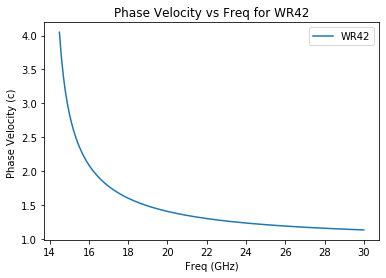

In [5]:
plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Phase Velocity (c) ', fontsize = 10)
plt.title("Phase Velocity vs Freq for WR42")

plt.plot(freq_BW_full, v_phase_WR42(freq_BW_full), label = 'WR42' )

plt.legend()
plt.show()

## Potential Solution: 

* Add a piece of WG between the Al Box and the Ambient Reciever to both U and I-side signals for symmetry in decreased gain. 
* Make delta L equal to the difference of waveguide path length within the apparatus. 
   

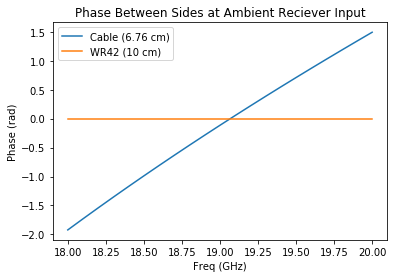

In [6]:
plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Phase (rad)', fontsize = 10)
plt.title("Phase Between Sides at Ambient Reciever Input")

plt.plot(freq_BW, phase_AddCable(freq_BW,delta_L,6.76),label = 'Cable (6.76 cm)' )
plt.plot(freq_BW, phase_AddWR42(freq_BW,delta_L,10),label = 'WR42 (10 cm)' )

plt.legend()
plt.show()

## Some Thoughts: 

* Effect on SNR: Any loss after the Aluminum Box Feedthroughs (meaning after the cold LNAs) has very little effect on SNR. 
    * As an example: Adding 10 dB of attenuation between the Al box and the Ambient Reciever, according to the Cascade Analysis, will only decrease our final SNR by **.01 dB**. 
* Coax Phase Matching: There is also a difference in length of the SS cables that transport the signal out of the copper box. We would also need precisely measured coax cables to account for that phase difference. 
    * How would we do this phase matching in practice? Does the ROACH have time resolution that would enable us to do this easily? 
* Precision of WR42 Component: What would happen if the relative WR42 delta L was ~.1 cm? See plot below: 
    * What does a phase difference of this magnitude do to us? 
* Can we more easily do this in software? 
    * Perhaps apply a Freq dependent phase matching within the ROACH?
    * One issue would be that a CRES event is our only means of inserting a signal into the Waveguides at the decay cell. So this phase matching might be tricky.

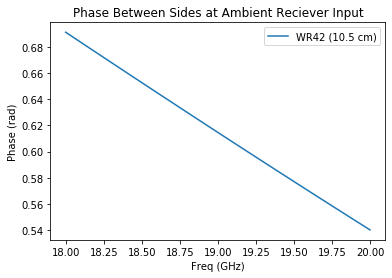

In [8]:
plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Phase (rad)', fontsize = 10)
plt.title("Phase Between Sides at Ambient Reciever Input")

add_L = 10.5
# plt.plot(freq_BW, phase_AddCable(freq_BW,delta_L,67.6),label = 'Cable (67.6 cm)' )
# plt.plot(freq_BW, phase_AddWR42(freq_BW,delta_L,add_L),label = 'WR42 ({} cm)'.format(add_L) )
plt.plot(freq_BW, np.cos(phase_AddWR42(freq_BW,delta_L,add_L)/2)**2,label = 'WR42 ({} cm)'.format(add_L) )

plt.legend()
plt.show()